<b>Exploring Hacker News</b><br>
In this project, we will look at two types of posts, Ask HN and Show HN from Hacker News.<br>
We will be comparing the two types of posts to see whether Ask HN or Show HN recevies more comments on average and whether there is a optimal time to post an article that would get more comments.<br>
The dataset was downloaded from Kaggle and had been pre-cleaned.<br>
This project is part of Dataquest.io Data Analyst/Data Scientist career path. 

In [1]:
#Importing packages needed

import pandas as pd
import numpy as np
import re
from scipy import stats
from scipy.stats import levene
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns


Importing file

In [2]:
hn = pd.read_csv('HN_posts_year_to_Sep_26_2016.csv')

In [3]:
print(hn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293119 entries, 0 to 293118
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            293119 non-null  int64 
 1   title         293119 non-null  object
 2   url           279256 non-null  object
 3   num_points    293119 non-null  int64 
 4   num_comments  293119 non-null  int64 
 5   author        293119 non-null  object
 6   created_at    293119 non-null  object
dtypes: int64(3), object(4)
memory usage: 15.7+ MB
None


|Column|Description|
| --- | --- |
id| the unique identifier for the post
title| the title of the post
url| the URL that the posts (if any)
num_points| total upvotes minus total downvotes
num_comments| the number of comments
author| the username of the author of the post
created_at| the date and time of submission

In [4]:
print(hn.head())

         id                                              title  \
0  12579008  You have two days to comment if you want stem ...   
1  12579005                         SQLAR  the SQLite Archiver   
2  12578997  What if we just printed a flatscreen televisio...   
3  12578989                                  algorithmic music   
4  12578979  How the Data Vault Enables the Next-Gen Data W...   

                                                 url  num_points  \
0  http://www.regulations.gov/document?D=FDA-2015...           1   
1   https://www.sqlite.org/sqlar/doc/trunk/README.md           1   
2  https://medium.com/vanmoof/our-secrets-out-f21...           1   
3  http://cacm.acm.org/magazines/2011/7/109891-al...           1   
4  https://www.talend.com/blog/2016/05/12/talend-...           1   

   num_comments        author      created_at  
0             0       altstar  9/26/2016 3:26  
1             0      blacksqr  9/26/2016 3:24  
2             0  pavel_lishin  9/26/2016 3:19  
3 

In [5]:
#Shortlisting posts that starts with 'Ask HN' or 'Show HN'
hn_shortlist = hn[hn['title'].str.contains('Ask HN|Show HN', case=False)]
#further shortlisting into two dataframes, hn_ask and hn_show
hn_ask = hn[hn['title'].str.contains('Ask HN', case=False)]
hn_show = hn[hn['title'].str.contains('Show HN', case=False)]

Determining if ask posts or show posts receive more comments on average:

In [6]:
print('HN Ask\n', hn_ask['num_comments'].describe())
print('\nHN Show\n', hn_show['num_comments'].describe())

HN Ask
 count    9147.000000
mean       10.385919
std        43.489889
min         0.000000
25%         1.000000
50%         2.000000
75%         6.000000
max      1007.000000
Name: num_comments, dtype: float64

HN Show
 count    10189.000000
mean         4.909805
std         16.358716
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        306.000000
Name: num_comments, dtype: float64


On average, HN Show posts receive more comments than HN Ask posts (10.39 vs 4.91)<br>
Based on the quartile statistics, it looks like the most posts in both HN Show and HN Ask does not have comments, with some viral posts with lots of comments that may skew the mean.

(-1.0079999999999998, 50.35]    8773
(50.35, 100.7]                   232
(100.7, 151.05]                   67
(151.05, 201.4]                   22
(201.4, 251.75]                   14
(251.75, 302.1]                    8
(302.1, 352.45]                    6
(352.45, 402.8]                    2
(402.8, 453.15]                    1
(453.15, 503.5]                    3
(503.5, 553.85]                    2
(553.85, 604.2]                    1
(604.2, 654.55]                    2
(654.55, 704.9]                    2
(704.9, 755.25]                    2
(755.25, 805.6]                    2
(805.6, 855.95]                    1
(855.95, 906.3]                    3
(906.3, 956.65]                    3
(956.65, 1007.0]                   1
Name: num_comments, dtype: int64


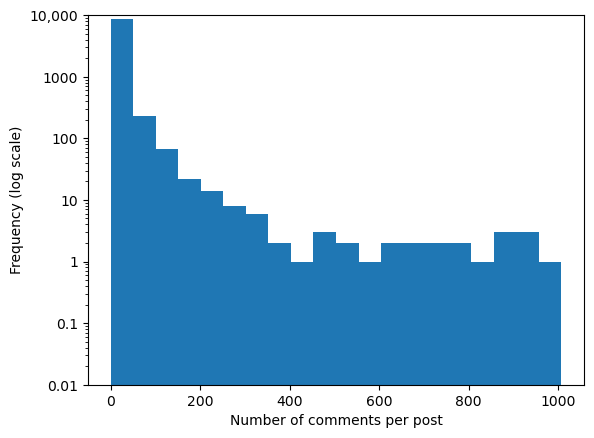

In [7]:
#Looking at distribution of comments in Ask HN
hn_askplot = hn_ask['num_comments'].value_counts(bins=20).sort_index()
print(hn_askplot)
a = hn_ask['num_comments'].plot(kind='hist', bins = 20, log=True)
plt.yticks(ticks=a.get_yticks(),labels=['0.01', '0.1','1','10', '100', '1000' , '10,000', '100,000', '1,000,000'])
plt.ylim(top=10000)
plt.xlabel('Number of comments per post')
plt.ylabel('Frequency (log scale)')
plt.show()

(-0.307, 15.3]    9424
(15.3, 30.6]       315
(30.6, 45.9]       183
(45.9, 61.2]       107
(61.2, 76.5]        55
(76.5, 91.8]        34
(91.8, 107.1]       21
(107.1, 122.4]       8
(122.4, 137.7]      13
(137.7, 153.0]       8
(153.0, 168.3]       6
(168.3, 183.6]       2
(183.6, 198.9]       3
(198.9, 214.2]       3
(214.2, 229.5]       0
(229.5, 244.8]       1
(244.8, 260.1]       2
(260.1, 275.4]       0
(275.4, 290.7]       2
(290.7, 306.0]       2
Name: num_comments, dtype: int64


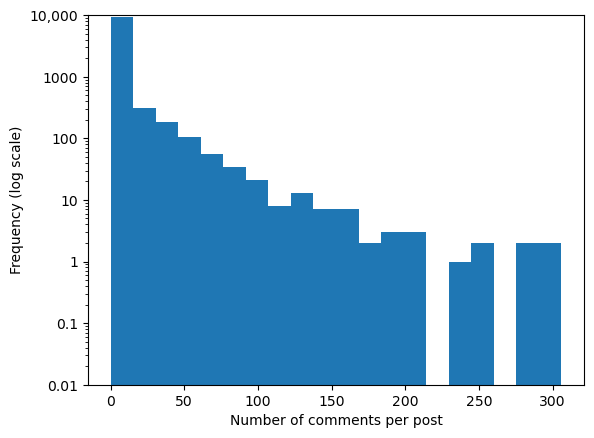

In [8]:
#Looking at distribution of comments in Show HN
hn_showplot = hn_show['num_comments'].value_counts(bins=20).sort_index()
print(hn_showplot)
s = hn_show['num_comments'].plot(kind='hist', bins = 20, log=True)
plt.yticks(ticks=a.get_yticks(),labels=['0.01', '0.1','1','10', '100', '1000' , '10,000', '100,000', '1,000,000'])
plt.ylim(top=10000)
plt.xlabel('Number of comments per post')
plt.ylabel('Frequency (log scale)')
plt.show()

Both Ask HN and Show HN posts have a postively skewed number of comments per post.

In [9]:
#Since data is skewed, we should use median
print('Ask HN median number of comments per post:', hn_ask['num_comments'].median())
print('Show HN median number of comments per post:', hn_show['num_comments'].median())



Ask HN median number of comments per post: 2.0
Show HN median number of comments per post: 0.0


In [10]:
#Perform Levene test for equal variances
st, pv = stats.levene(hn_ask['num_comments'],hn_show['num_comments'])
print(st, pv)

106.3511378386383 7.16459451143857e-25


In [11]:
#Running 2 samples t-test with unequal variance
t_test, pvalue = stats.ttest_ind(hn_ask['num_comments'], hn_show['num_comments'],equal_var = False)
print('pvalue =',pvalue)

pvalue = 1.1463337018246766e-29


Ask HN posts have higher median number of comments per post compared to Show HN and the difference is statistically significant (p<0.0001).

Next, we will be looking at whether the time of post affects the number of post interactions (by comments count)

In [12]:
print(hn_ask['created_at'])

10         9/26/2016 2:53
42         9/26/2016 1:17
76        9/25/2016 22:57
80        9/25/2016 22:48
102       9/25/2016 21:50
               ...       
293047     9/6/2015 11:27
293052     9/6/2015 10:52
293055     9/6/2015 10:46
293073      9/6/2015 9:36
293114      9/6/2015 6:02
Name: created_at, Length: 9147, dtype: object


In [13]:
time = hn_ask['created_at'].str.split(' ')
timelist = []
for x in time:
    times = x[1]
    hour = times.split(':')
    hour = int(hour[0])
    timelist.append(hour)

hn_ask['post_hour'] = timelist
print(hn_ask['post_hour'])

10         2
42         1
76        22
80        22
102       21
          ..
293047    11
293052    10
293055    10
293073     9
293114     6
Name: post_hour, Length: 9147, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_18084\2647025751.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hn_ask['post_hour'] = timelist


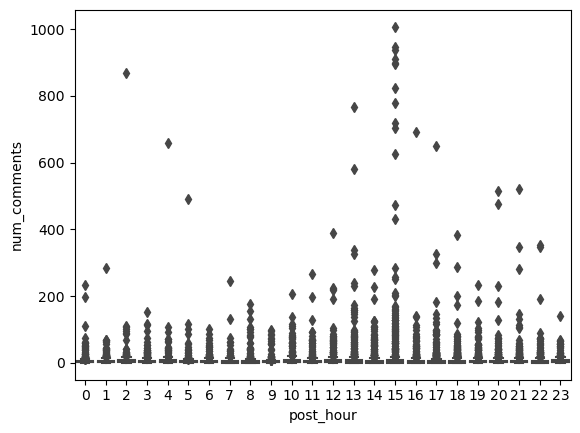

In [14]:
ask_hour = sns.boxplot(data = hn_ask, x='post_hour', y='num_comments', orient = 'v')


In [15]:
hn_ask.pivot_table(index = 'post_hour', values = 'num_comments', aggfunc = (np.mean, np.median, min, max))

,max,mean,median,min
post_hour,,,,
0,234,7.564784,2.0,0
1,285,7.407801,2.0,0
2,868,11.137546,4.0,0
3,151,7.937500,2.0,0
4,660,9.711934,2.0,0
5,490,8.766667,2.0,0
6,100,6.782051,2.0,0
7,244,7.013274,2.0,0
8,176,9.190661,2.0,0


Ask HN posts that are posted at 1500 hours appear to garner the most interaction via comments. It has the highest mean number of comments per post (28.6). When looking at the boxplot, there are more viral posts with high number of comments that are posted at 1500 hours compared to other time. <br>
For normal, non-viral posts, 0200 hour posts had the highest median number of comment (4).

In [16]:
#Checking if the pattern is the same with Show HN posts
timeshow = hn_show['created_at'].str.split(' ')
timelistshow = []
for x in timeshow:
    times = x[1]
    hour = times.split(':')
    hour = int(hour[0])
    timelistshow.append(hour)

hn_show['post_hour'] = timelistshow
print(hn_show['post_hour'])

52         0
58         0
64        23
70        23
140       20
          ..
292995    14
293002    13
293019    13
293028    12
293037    12
Name: post_hour, Length: 10189, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_18084\269392714.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hn_show['post_hour'] = timelistshow


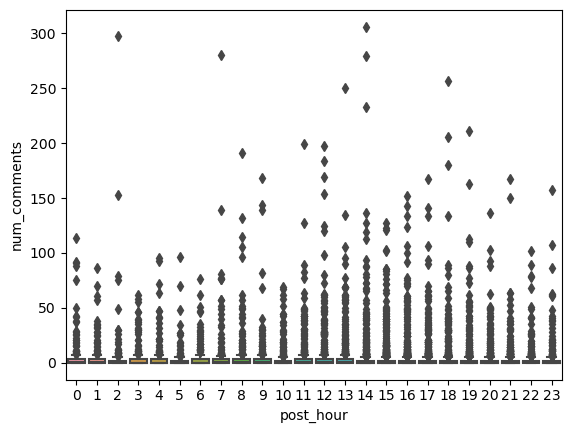

In [17]:
show_hour = sns.boxplot(data = hn_show, x='post_hour', y='num_comments', orient = 'v')

In [18]:
hn_show.pivot_table(index = 'post_hour', values = 'num_comments', aggfunc = (np.mean, np.median, min, max))

,max,mean,median,min
post_hour,,,,
0,114,4.648551,1.0,0
1,86,4.060484,1.0,0
2,298,5.166667,0.5,0
3,62,4.516908,0.0,0
4,95,5.000000,0.0,0
5,96,3.441860,0.0,0
6,76,4.689119,0.0,0
7,280,6.682203,1.0,0
8,191,5.602524,1.0,0


For Show HN posts, it typically receive lesser comment interactions compared to Ask HN posts. Based on the pivot table, posts that are posted at 1200 hour have the highest average number of comments (7) and is tied with multiple other timing in terms of median number of comments per post (1). 